### Covid dataset

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
covid_data = pd.read_csv("../dataset/covid.csv")

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [8]:
covid_data.fillna(0, inplace=True)

In [9]:
covid_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,MSR
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,FLK
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,VAT


In [14]:
covid_data['Country/Region'].duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205    False
206    False
207    False
208    False
Name: Country/Region, Length: 209, dtype: bool

In [18]:
covid_data.var(numeric_only=True)

Population          1.092759e+16
TotalCases          1.871312e+11
NewCases            2.152531e+05
TotalDeaths         2.169433e+08
NewDeaths           3.236954e+03
TotalRecovered      6.469227e+10
NewRecovered        8.601986e+04
ActiveCases         2.992456e+10
Serious,Critical    2.508534e+06
Tot Cases/1M pop    2.687600e+07
Deaths/1M pop       2.829388e+04
TotalTests          2.832659e+13
Tests/1M pop        2.186547e+10
dtype: float64

In [28]:
country_with_cases = covid_data.groupby("Country/Region").aggregate("TotalCases").max().sort_values(ascending=False)

In [29]:
country_with_cases.head(10)

Country/Region
USA             5032179
Brazil          2917562
India           2025409
Russia           871894
South Africa     538184
Mexico           462690
Peru             455409
Chile            366671
Colombia         357710
Spain            354530
Name: TotalCases, dtype: int64

/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_29989/898151016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(country_with_cases.head(10), palette=palette)


<Axes: xlabel='Country/Region', ylabel='TotalCases'>

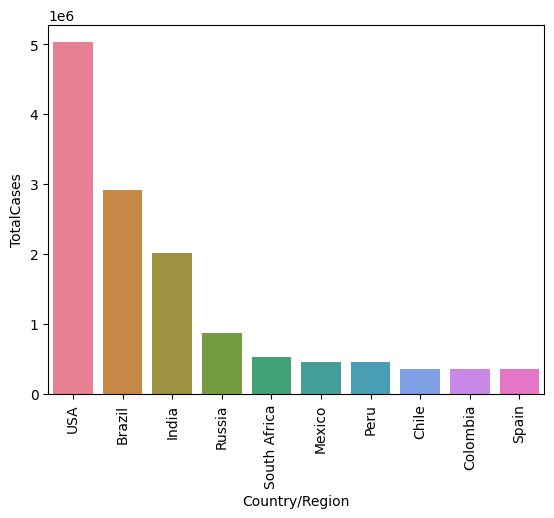

In [37]:
unique_bars = len(country_with_cases.head(10))
palette = sns.color_palette("husl", unique_bars)
plt.xticks(rotation=90)
sns.barplot(country_with_cases.head(10), palette=palette)

In [38]:
covid_data['death_rate'] = covid_data['TotalDeaths'] / covid_data['TotalCases']

In [39]:
covid_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,death_rate
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,0.032353
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,0.033810
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,0.020558
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,0.016752
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,0.017845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,MSR,0.076923
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,,0.000000
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,FLK,0.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,VAT,0.000000


In [43]:
covid_data.groupby("Country/Region").aggregate("death_rate").value_counts()

Country/Region  death_rate
Afghanistan     0.035180      1
Albania         0.031250      1
Algeria         0.037858      1
Andorra         0.055085      1
Angola          0.043156      1
                             ..
Vietnam         0.013387      1
Western Sahara  0.100000      1
Yemen           0.287330      1
Zambia          0.027778      1
Zimbabwe        0.019359      1
Name: count, Length: 209, dtype: int64

In [44]:
covid_data['recovery_rate'] = covid_data['TotalRecovered'] / covid_data['TotalCases']

In [45]:
covid_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,death_rate,recovery_rate
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,0.032353,0.512038
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,0.033810,0.701839
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,0.020558,0.680052
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,0.016752,0.775733
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,0.017845,0.719672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,MSR,0.076923,0.769231
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,,0.000000,0.538462
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,FLK,0.000000,1.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,VAT,0.000000,1.000000


In [49]:
# sns.barplot(data=covid_data)
covid_data.aggregate("Continent").drop_duplicates(inplace=True)

In [50]:
covid_data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha,death_rate,recovery_rate
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA,0.032353,0.512038
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA,0.033810,0.701839
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND,0.020558,0.680052
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS,0.016752,0.775733
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF,0.017845,0.719672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,MSR,0.076923,0.769231
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,,0.000000,0.538462
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,FLK,0.000000,1.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,VAT,0.000000,1.000000


In [ ]:
covid_data.groupby("Continent")

Continent
Africa               57
Asia                 48
Europe               48
North America        35
South America        14
Australia/Oceania     6
0                     1
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='TotalCases'>

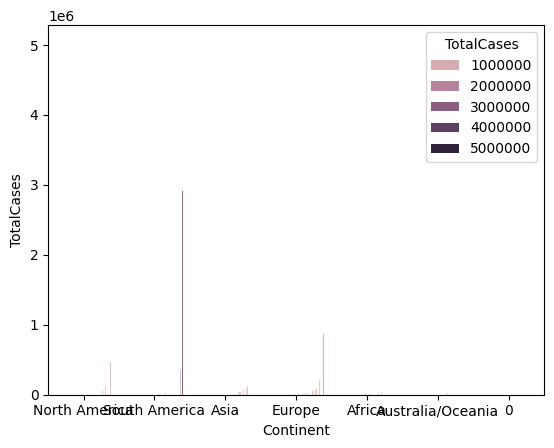

In [54]:
sns.barplot(data=covid_data, hue='TotalCases', x='Continent', y='TotalCases')

<Axes: xlabel='Country/Region', ylabel='TotalCases'>

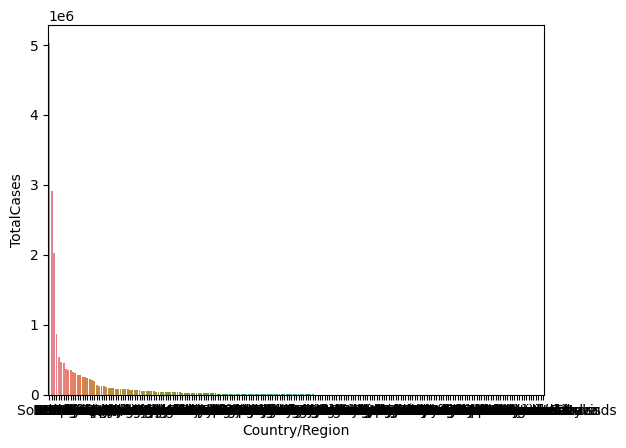

In [57]:
sns.barplot(data=covid_data, hue='Country/Region', x='Country/Region', y='TotalCases')

In [58]:
continent_summary = (
    covid_data.groupby("Continent")[["TotalCases", "TotalDeaths", "TotalRecovered"]]
      .sum()
      .reset_index()
)

In [59]:
continent_summary

,Continent,TotalCases,TotalDeaths,TotalRecovered
0,0,712,13.0,651.0
1,Africa,1011867,22114.0,693620.0
2,Asia,4689794,100627.0,3508170.0
3,Australia/Oceania,21735,281.0,12620.0
4,Europe,2982576,205232.0,1587302.0
5,North America,5919209,229855.0,3151678.0
6,South America,4543273,154885.0,3116150.0


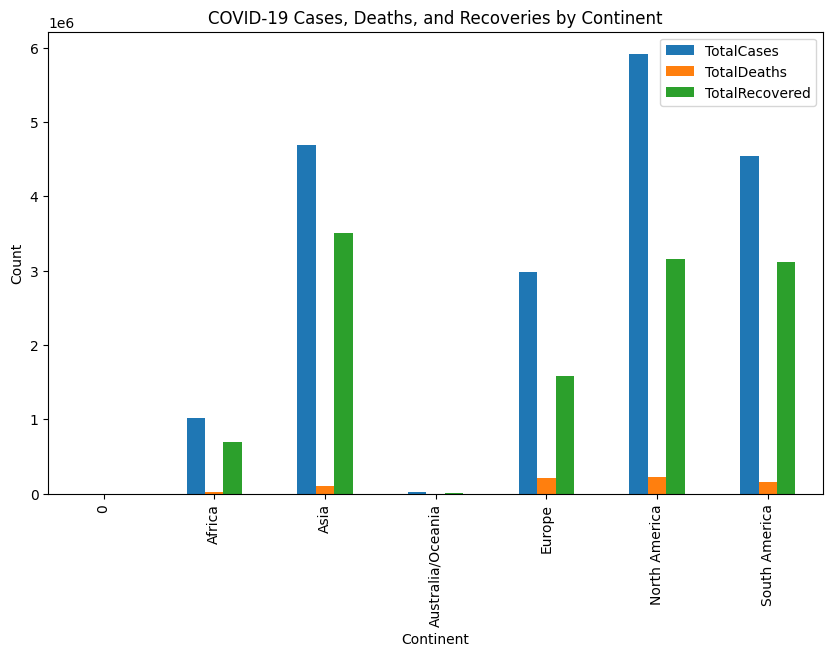

In [62]:
continent_summary.plot(
    x="Continent",
    y=["TotalCases", "TotalDeaths", "TotalRecovered"],
    kind="bar",
    figsize=(10,6)
)
plt.title("COVID-19 Cases, Deaths, and Recoveries by Continent")
plt.ylabel("Count")
plt.xlabel("Continent")
plt.xticks(rotation=90)
plt.show()

In [66]:
continent_data = covid_data.groupby("Continent")[['TotalCases', "TotalDeaths", "TotalRecovered"]].sum().reset_index()

In [67]:
continent_data

,Continent,TotalCases,TotalDeaths,TotalRecovered
0,0,712,13.0,651.0
1,Africa,1011867,22114.0,693620.0
2,Asia,4689794,100627.0,3508170.0
3,Australia/Oceania,21735,281.0,12620.0
4,Europe,2982576,205232.0,1587302.0
5,North America,5919209,229855.0,3151678.0
6,South America,4543273,154885.0,3116150.0


In [70]:
continent_data['fatality_ratio'] = ((continent_data['TotalDeaths'] / continent_data['TotalCases']) * 100)

In [69]:
continent_data

,Continent,TotalCases,TotalDeaths,TotalRecovered,fatality_ratio
0,0,712,13.0,651.0,1.825843
1,Africa,1011867,22114.0,693620.0,2.185465
2,Asia,4689794,100627.0,3508170.0,2.145659
3,Australia/Oceania,21735,281.0,12620.0,1.292846
4,Europe,2982576,205232.0,1587302.0,6.881032
5,North America,5919209,229855.0,3151678.0,3.883205
6,South America,4543273,154885.0,3116150.0,3.409106


In [75]:
region_data = covid_data.groupby("WHO Region")[["Population","TotalTests"]].sum().reset_index()

In [77]:
region_data["test_ratio"] = (region_data["TotalTests"] / region_data["Population"]) * 100

In [78]:
region_data

,WHO Region,Population,TotalTests,test_ratio
0,0,9.681369e+06,372279.0,3.845314
1,Africa,1.118461e+09,6856722.0,0.613050
2,Americas,1.018880e+09,92420577.0,9.070805
3,EasternMediterranean,7.320077e+08,19885783.0,2.716608
4,Europe,9.277339e+08,108184582.0,11.661165
5,South-EastAsia,1.997513e+09,26922262.0,1.347789
6,WesternPacific,5.221449e+08,13217093.0,2.531308


# Graphs

In [94]:
top10_deaths_country = covid_data.groupby("Country/Region").aggregate("TotalDeaths").sum().sort_values(ascending=False).head(10)

/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_29989/397523666.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top10_deaths_country, palette=palette)


<Axes: xlabel='Country/Region', ylabel='TotalDeaths'>

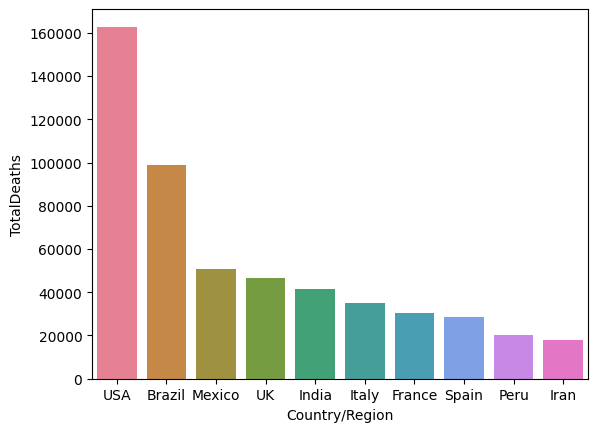

In [ ]:
sns.barplot(top10_deaths_country, palette=palette)

In [98]:
# sns.heatmap(top10_deaths_country)
top10_deaths_country

Country/Region
USA       162804.0
Brazil     98644.0
Mexico     50517.0
UK         46413.0
India      41638.0
Italy      35187.0
France     30312.0
Spain      28500.0
Peru       20424.0
Iran       17976.0
Name: TotalDeaths, dtype: float64

In [102]:
correlation_data = covid_data[["TotalCases", "TotalDeaths", "ActiveCases", "TotalTests"]].corr()

<Axes: >

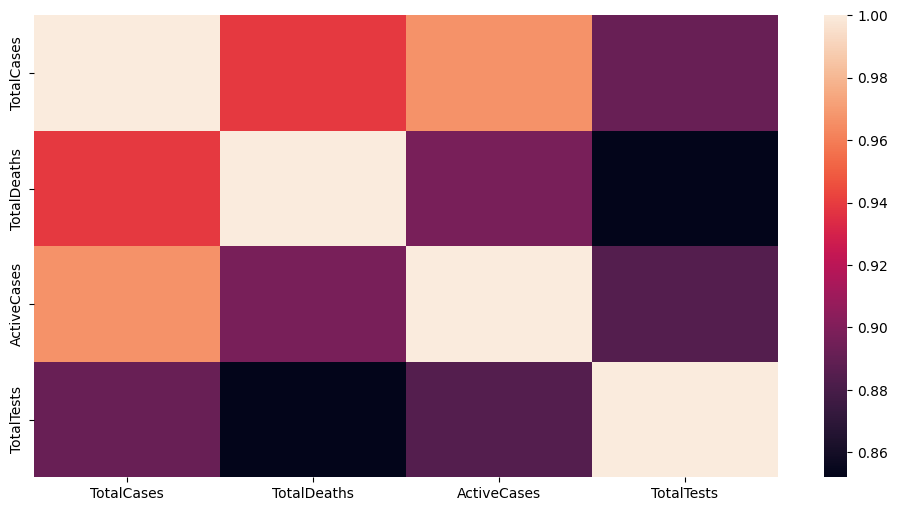

In [110]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_data)

In [113]:
fig = px.choropleth(
    covid_data,
    locations="iso_alpha",            # ISO country codes
    color="Tot Cases/1M pop",         # Cases per million
    hover_name="Country/Region",      # Show country on hover
    color_continuous_scale="Reds",    # Color scale
    title="COVID-19 Cases per Million Population (World Map)"
)

fig.show()

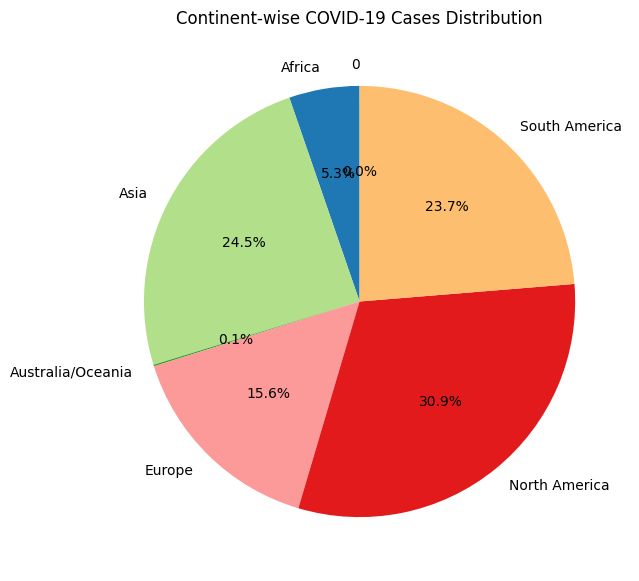

In [133]:
continent_cases = covid_data.groupby("Continent")["TotalCases"].sum()
plt.figure(figsize=(7,7))
plt.pie(
    continent_cases.values,          # numeric values
    labels=continent_cases.index,    # continent names
    autopct="%1.1f%%",               # show % inside pie
    startangle=90,                   # rotate so it looks cleaner
    colors=plt.cm.Paired.colors      # color palette
)

plt.title("Continent-wise COVID-19 Cases Distribution")
plt.show()